In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load obstacle data

# data = np.genfromtxt('/home/oscar_palfelt/MSc_thesis/LearnedSamplingDistributions/narrowDataFile.txt', delimiter=',', usecols=range(27))
# numEntries = data.shape[0]
# obsData = data[:, 6:-13]

data = np.genfromtxt('/home/oscar_palfelt/MSc_thesis/EECS_Degree_Project/motion_planning/pathData3', delimiter=',')
numEntries = data.shape[0]
obsData = data[:, 5:14]

In [4]:
# Generate occupancy grid
def isSampleFree(sample, obs):
    for o in list(range(0,obs.shape[0]//(2*dimW))): # python 2 -> 3: use list(), use //
        isFree = 0
        for d in range(0,sample.shape[0]):
            if (sample[d] < obs[2*dimW*o + d] or sample[d] > obs[2*dimW*o + d + dimW]):
                isFree = 1
                break
        if isFree == 0:
            return 0
    return 1

gridSize = 11

# process data into occupancy grid
occGrids = np.zeros([numEntries,gridSize*gridSize])
occGridSamples = np.zeros([gridSize*gridSize, 2])
gridPointsRange = np.linspace(0,1,num=gridSize)

idx = 0;
for i in gridPointsRange:
    for j in gridPointsRange:
        occGridSamples[idx,0] = i
        occGridSamples[idx,1] = j
        idx += 1;

for j in range(0,numEntries,1):
    dw = 0.1
    dimW = 3
    gap1 = obsData[j,0:3]
    gap2 = obsData[j,3:6]
    gap3 = obsData[j,6:9]

    obs1 = [0, gap1[1]-dw, -0.5,          gap1[0], gap1[1], 1.5]
    obs2 = [gap2[0]-dw, 0, -0.5,          gap2[0], gap2[1], 1.5]
    obs3 = [gap2[0]-dw, gap2[1]+dw, -0.5, gap2[0], 1, 1.5]
    obs4 = [gap1[0]+dw, gap1[1]-dw, -0.5, gap3[0], gap1[1], 1.5]
    obs5 = [gap3[0]+dw, gap1[1]-dw, -0.5, 1, gap1[1], 1.5]
    obs = np.concatenate((obs1, obs2, obs3, obs4, obs5), axis=0)
    
    if j % 5000 == 0:
        print('Iter: {}'.format(j))
        
    occGrid = np.zeros(gridSize*gridSize)
    for i in range(0,gridSize*gridSize):
        occGrid[i] = isSampleFree(occGridSamples[i,:],obs)
    occGrids[j,:] = occGrid

Iter: 0
Iter: 5000
Iter: 10000
Iter: 15000
Iter: 20000
Iter: 25000
Iter: 30000
Iter: 35000
Iter: 40000
Iter: 45000
Iter: 50000
Iter: 55000
Iter: 60000


(2,)
(2,)
(25, 2)


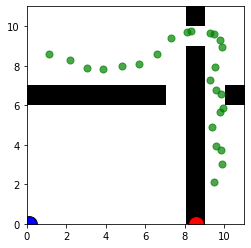

(2,)
(2,)
(20, 2)


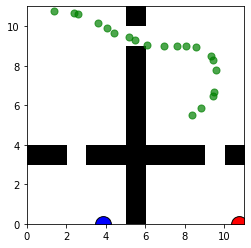

(2,)
(2,)
(18, 2)


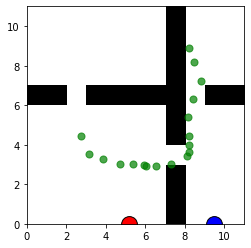

(2,)
(2,)
(20, 2)


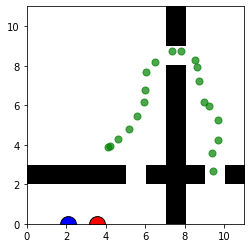

(2,)
(2,)
(9, 2)


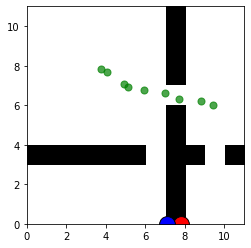

(2,)
(2,)
(21, 2)


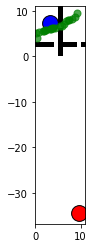

(2,)
(2,)
(22, 2)


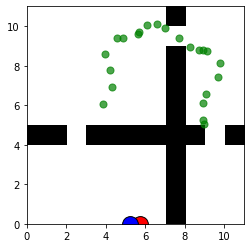

(2,)
(2,)
(23, 2)


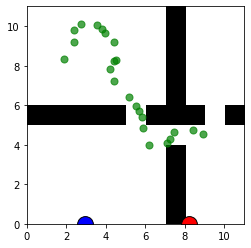

(2,)
(2,)
(8, 2)


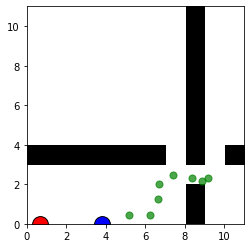

(2,)
(2,)
(12, 2)


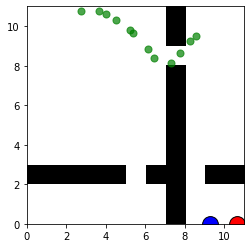

(2,)
(2,)
(21, 2)


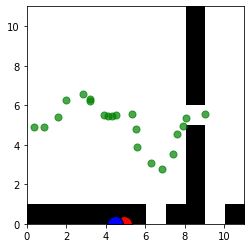

(2,)
(2,)
(10, 2)


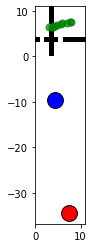

(2,)
(2,)
(26, 2)


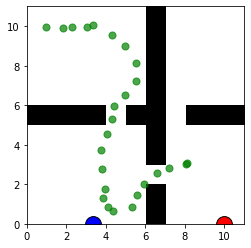

(2,)
(2,)
(7, 2)


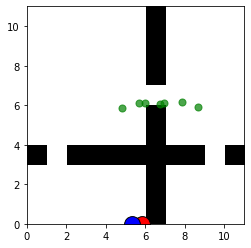

(2,)
(2,)
(26, 2)


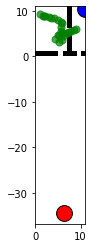

(2,)
(2,)
(10, 2)


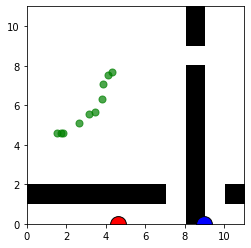

(2,)
(2,)
(24, 2)


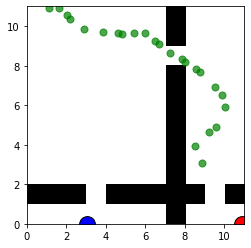

(2,)
(2,)
(16, 2)


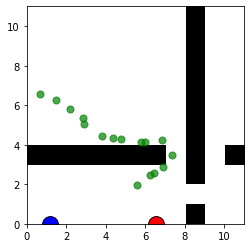

(2,)
(2,)
(20, 2)


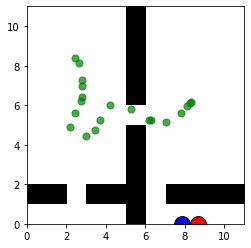

(2,)
(2,)
(20, 2)


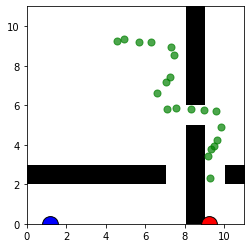

(2,)
(2,)
(6, 2)


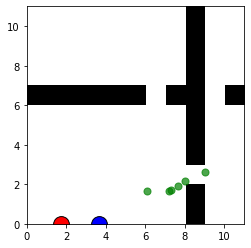

(2,)
(2,)
(12, 2)


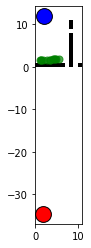

(2,)
(2,)
(15, 2)


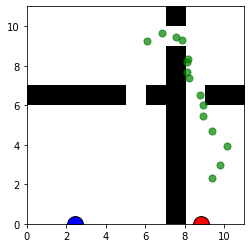

(2,)
(2,)
(15, 2)


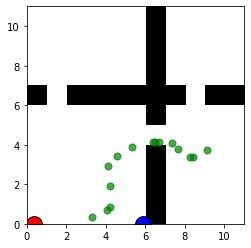

(2,)
(2,)
(20, 2)


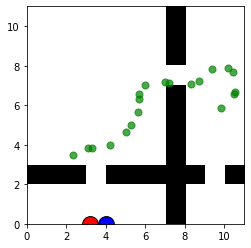

(2,)
(2,)
(20, 2)


KeyboardInterrupt: 

In [7]:
# vizualize data samples of 6D pose problem (x,y,yaw,steer,xdot,ydot)

val = data[0, 6]
npaths = 0
plot = True
prevInd = 0
for i in range(0, 1000):
    if not val == data[i, 6]:

        if plot:
            grid = np.rot90(occGrids[prevInd,:].reshape(11,11))

            xy = data[prevInd:i-1, 0:2]
            init = data[prevInd, 15:17]
            goal = data[prevInd, 20:22]

            print(init.shape)
            print(goal.shape)
            print(xy.shape)

            fig, axs = plt.subplots(1)
            axs.imshow(grid, extent=[0, 11, 0, 11], cmap='gray')
            axs.scatter(init[0] * grid.shape[1], init[1] * grid.shape[0], color="red", s=250, edgecolors='black')
            axs.scatter(goal[0] * grid.shape[1], goal[1] * grid.shape[0], color="blue", s=250, edgecolors='black')
            axs.scatter(xy[:, 0] * grid.shape[1], xy[:, 1] * grid.shape[0], color="green", s=50, alpha=0.7)
            plt.show()

        if i - prevInd > 2:
            npaths += 1
        val = data[i, 6]
        prevInd = i

print(npaths)

[0.073784 0.779134]


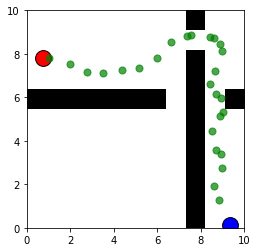

[0.115437 0.976505]


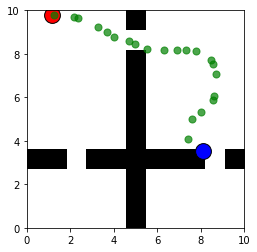

[0.192415 0.469913]


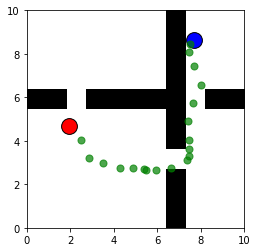

[0.302904 0.322628]


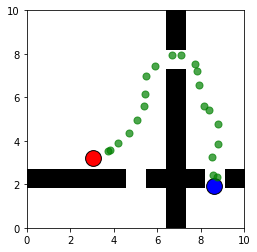

[0.319426 0.710938]


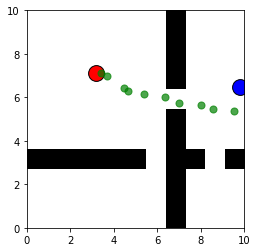

[0.888182 0.876386]


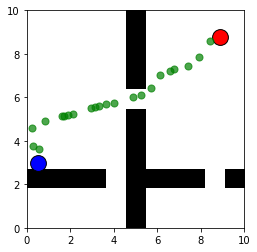

[0.279705 0.521991]


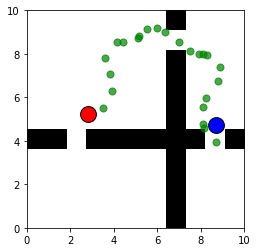

[0.083415 0.745149]


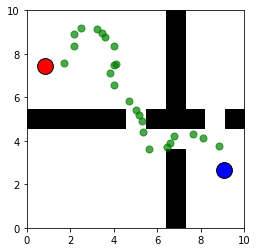

[0.382742 0.059491]


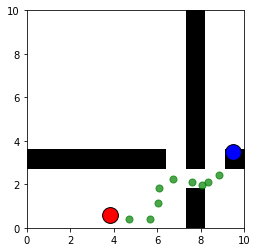

[0.181898 0.968119]


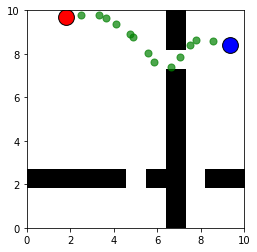

[0.020847 0.447286]


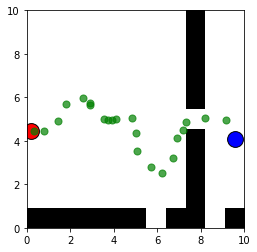

[0.741911 0.684337]


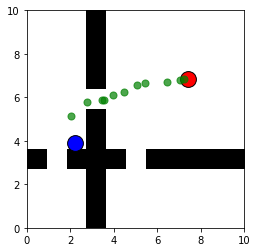

[0.068968 0.905683]


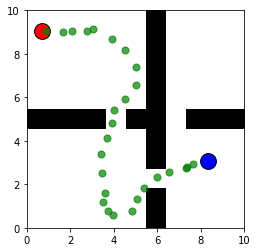

[0.409655 0.530074]


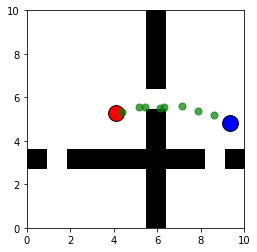

[0.860626 0.566361]


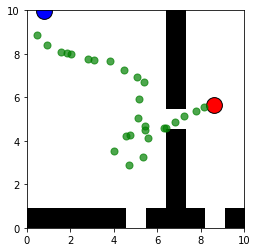

[0.076612 0.417517]


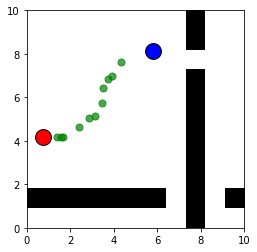

[0.07987  0.991682]


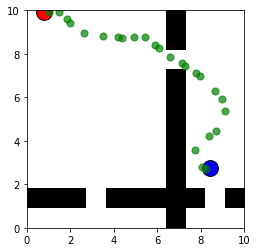

[0.038544 0.596298]


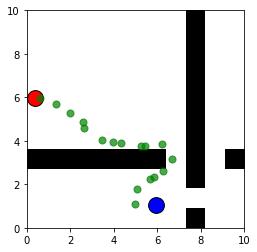

[0.147059 0.78731 ]


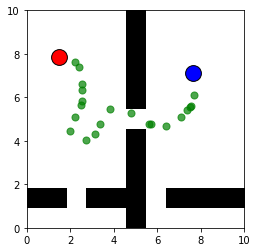

[0.376019 0.836977]


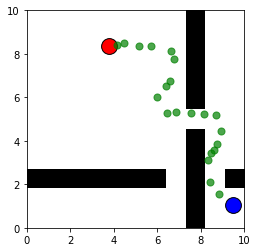

[0.492536 0.157382]


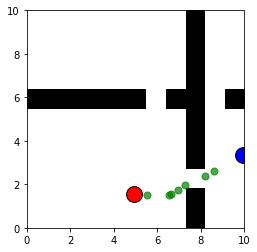

[0.51117  0.158528]


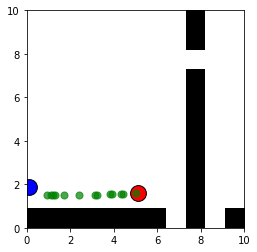

[0.478873 0.800927]


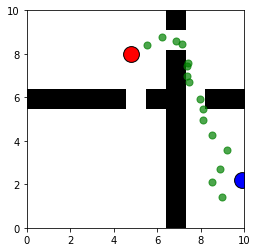

[0.2884   0.031621]


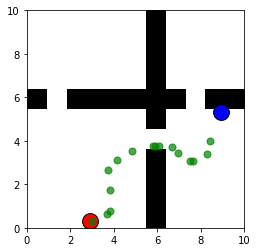

[0.137018 0.292454]


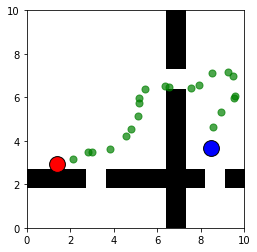

[0.440605 0.958984]


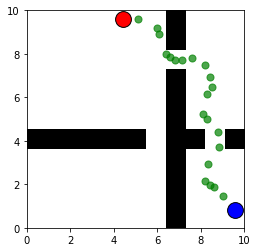

[0.434021 0.250552]


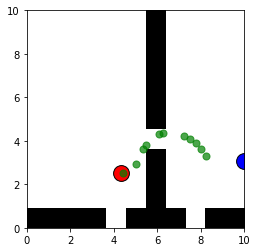

[0.318502 0.661598]


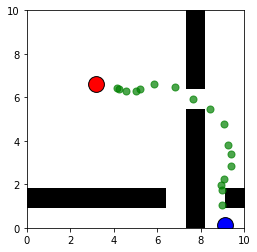

[0.246812 0.931689]


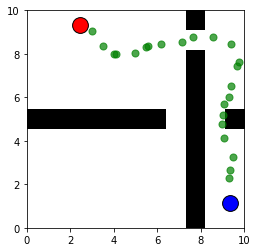

[0.538199 0.766902]


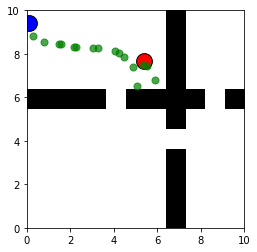

[0.276004 0.387757]


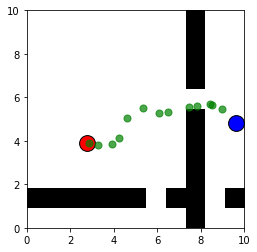

[0.407911 0.190111]


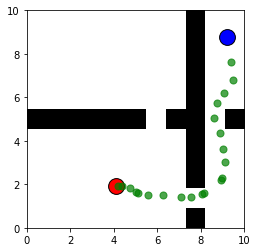

[0.887257 0.68975 ]


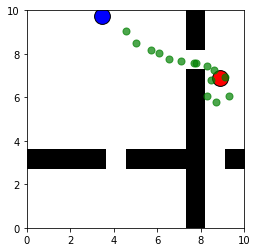

[0.537513 0.158906]


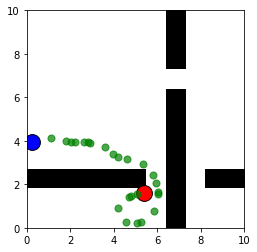

[0.236855 0.840957]


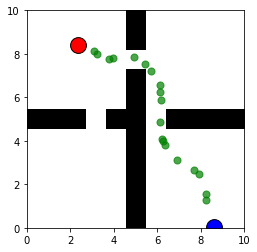

[0.193875 0.257955]


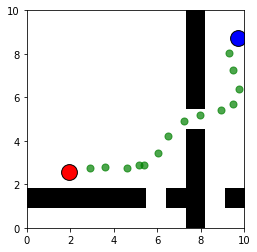

[0.274039 0.527022]


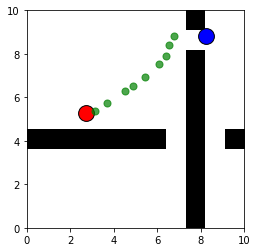

[0.178381 0.642622]


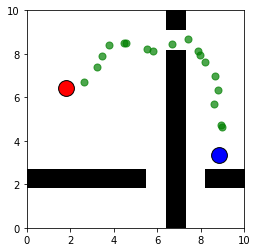

[0.406537 0.974866]


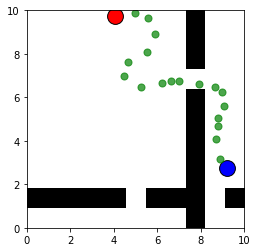

[0.928831 0.735828]


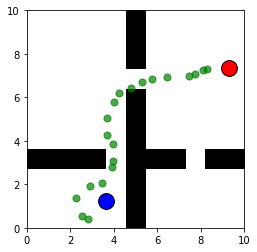

[0.47426  0.550029]


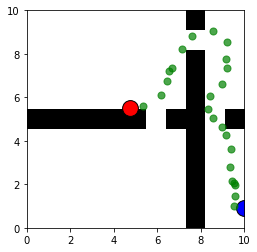

[0.453192 0.388433]


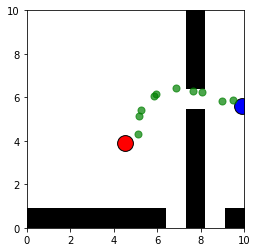

[0.05417  0.212643]


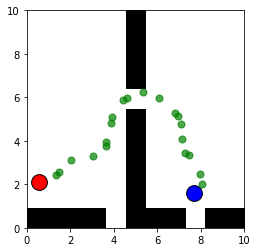

[0.3125   0.235963]


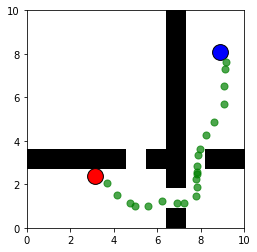

[0.225515 0.739196]


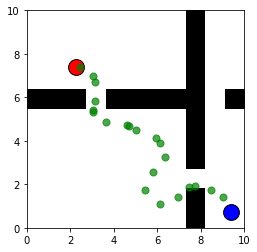

[0.654949 0.709155]


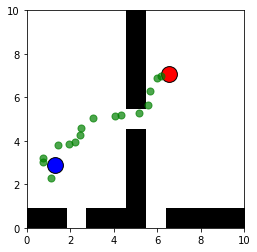

[0.11239  0.842968]


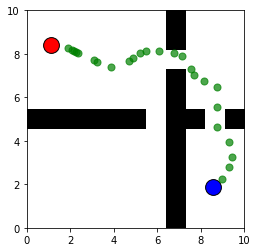

[0.92626  0.569769]


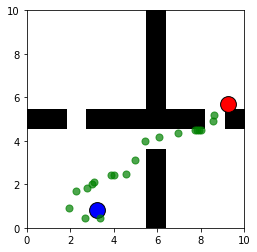

[0.356621 0.431625]


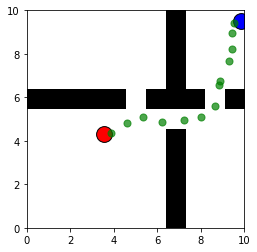

[0.354169 0.316666]


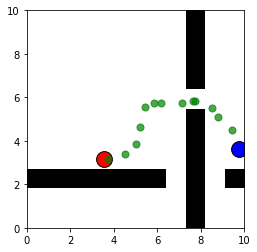

[0.489308 0.455188]


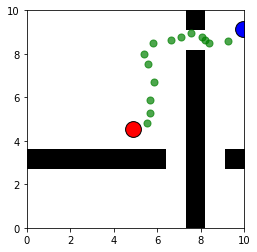

[0.011043 0.38178 ]


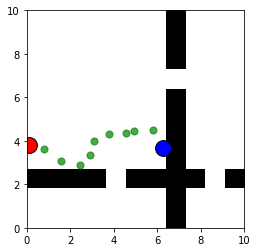

[0.16377  0.401991]


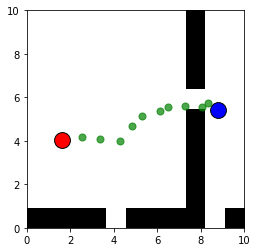

[0.476894 0.335086]


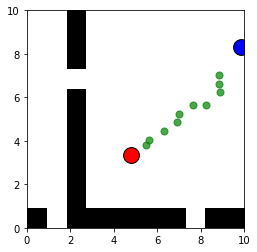

[0.206046 0.476788]


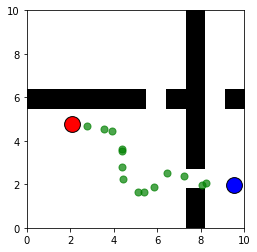

[0.332689 0.076037]


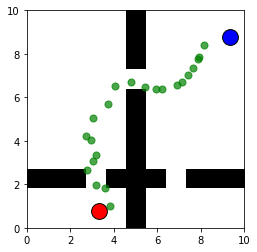

[0.026543 0.557263]


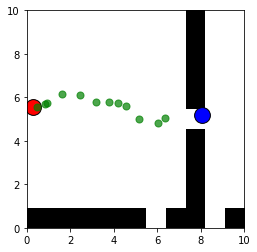

[0.398096 0.453465]


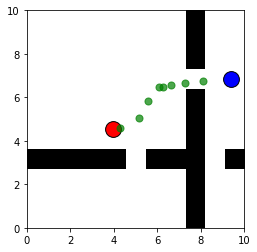

58


In [9]:
# vizualize data samples of 5D pose problem (x,y,yaw,xdot,ydot)

val = data[0, 5]
npaths = 0
plot = True
prevInd = 0

for i in range(0, 1000):
    if not val == data[i, 5] or i == numEntries - 1:

        if plot:

            grid = np.rot90(occGrids[prevInd,:].reshape(11,11))

            xy = data[prevInd:i+int(i == numEntries - 1) , 0:2]
            xydot = data[prevInd:i+int(i == numEntries - 1), 3:5]
            init = data[prevInd, 14:16]
            goal = data[prevInd, 19:21]
            print(init)

            fig, ax = plt.subplots()
            ax.imshow(grid, extent=[0, gridSize-1, 0, gridSize-1], cmap='gray')
            plt.scatter(init[0] * (gridSize-1), init[1] * (gridSize-1), color="red", s=250, edgecolors='black')
            plt.scatter(goal[0] * (gridSize-1), goal[1] * (gridSize-1), color="blue", s=250, edgecolors='black')
            plt.scatter(xy[:, 0] * (gridSize-1), xy[:, 1] * (gridSize-1), color="green", s=50, alpha=0.7)
            #plt.scatter(xydot[:, 0] * grid.shape[1], xydot[:, 1] * grid.shape[0], color="purple", s=50, alpha=0.7)
            plt.show()

        if i - prevInd > 2:
            npaths += 1

        val = data[i, 5]
        prevInd = i

print(npaths)